In [3]:
import os
from tqdm import tqdm
import random
import numpy as np
import netwulf as nw
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm
# if os.getcwd()[-1] in '0123456798':
#     path_parent = os.path.dirname(os.getcwd())
#     os.chdir(path_parent)

In [4]:
# Load the graph
stylized_network, config, G = nw.load("Graph.json")

In [5]:
# Compute the communities
partition = nx_comm.louvain_communities(G)

In [6]:
# Create a list of the number of nodes in each community
sizes = [len(c) for c in partition]
print(f'The average community size is {round(np.mean(sizes),2)}, with a standard deviation of {round(np.std(sizes),2)}. The largest is of size {np.max(sizes)} and the smallest {np.min(sizes)}')

The average community size is 50.21, with a standard deviation of 199.77. The largest is of size 2732 and the smallest 1


In the next section we colour the communities based on their size, which in the case of the largest communities will result in different colours as seen in the output above.

In [24]:
# Create an np array of nodes to use for finding their positions in the graph's list
G_where = np.array(G.nodes)
# Initialize the array for colours and the values for which to colour
degreeColor = np.empty(len(G_where), dtype=object)
valueToPlot = np.log10(sizes)
# we rescale the colours to be in the RGB format (0 to 255 for three colours)
valueToPlotRescaled = 255*(valueToPlot - np.min(valueToPlot))/np.max(valueToPlot)

for size, c in zip(sizes, partition):
    for node in c:
        # Use the size to set the colour
        color = '#%02x%02x%02x' % (int(size), 0, 50)
        degreeColor[np.where(G_where == node)] = color
# zip it up into a dictionary and set it as node attribute
dictionaryColor = dict(zip(list(G.nodes), degreeColor))
nx.set_node_attributes(G, dictionaryColor, 'group')

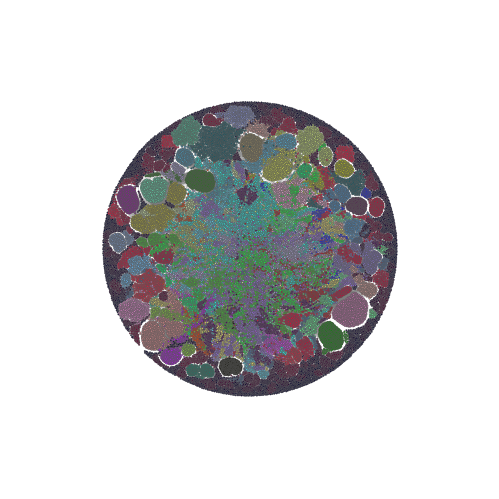

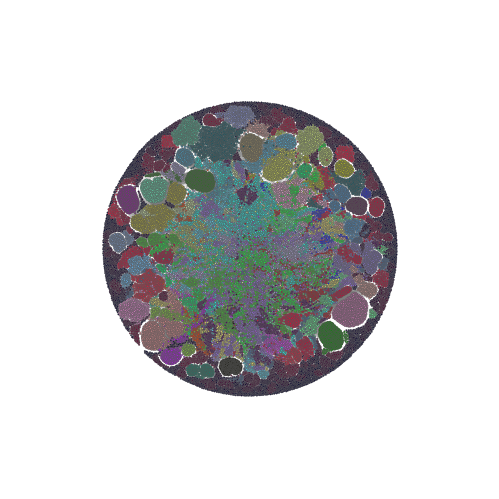

In [25]:
# Use netwulf to draw the graph with the coloured nodes
network, config = nw.visualize(G, config={'zoom':0.6, 'node charge':-15, 'node gravity': 0.7})
fig, ax = nw.draw_netwulf(network)
plt.savefig('Graph_coloured_')

Looking at the graph, we clearly see some large communities of authors, along with a background of smaller communities.

In [5]:
# Redefine the modularity function as this was done in separate notebooks which were concatenated
def modularity(G, communities):
    m = G.number_of_edges()
    q = 0.0
    for c in communities:
        lc = G.subgraph(c).number_of_edges()
        kc = sum(G.degree(n) for n in c)
        q += lc/m - (kc/(2*m))**2
    return q

In [ ]:
modularity_from_current_communities = modularity(G, partition)

current modularity =  0.9231428593851565


The modularity is rather far from 0 and close to 1, indicating that the graph is very strongly split up into different communities.